## Calculating new dependent and independent variables, and modelling

In [1]:
import pandas as pd
import numpy as np

FILE_PATH = r"../generated_data/cp3_modelling/"

In [2]:
df_epi = pd.read_csv(FILE_PATH+"epidemiology_subset.csv")
df_search_trends = pd.read_csv(FILE_PATH+"google-search-trends_subset.csv")
df_gvt_resp = pd.read_csv(FILE_PATH+"government_response_subset.csv")
df_mobility = pd.read_csv(FILE_PATH+"mobility_subset.csv")
df_vacc_search = pd.read_csv(FILE_PATH+"vaccination_search_subset.csv")
df_vacc = pd.read_csv(FILE_PATH+"vaccinations_subset.csv")

df_index = pd.read_csv(r"../datasets/index.csv")
df_demographics = pd.read_csv(r"../datasets/demographics.csv")

### Part 3: Which approach was more effective - Direct Response

*Direct Response: Whether people actually followed/cared about the restrictions/strictness*

Indepenent variable 1 (direct response) - a combined figure that we get from compiling the direct and indirect responses- level of mobility (add the 6 - to get net change), number of new vaccinations, frequency of searches (add the covid-related ones - consolidated frequency indication) (try logging)


Dependent variables - the reduced govt response dataset

In [3]:
df_vacc.head()

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,402023,2021-01-10,GB,NaN,2286572.0,NaN,391399.0,NaN,2677971.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402024,2021-01-11,GB,145076.0,2431648.0,20768.0,412167.0,165844.0,2843815.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402025,2021-01-12,GB,207661.0,2639309.0,16065.0,428232.0,223726.0,3067541.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402026,2021-01-13,GB,278943.0,2918252.0,9745.0,437977.0,288688.0,3356229.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402027,2021-01-14,GB,316694.0,3234946.0,5257.0,443234.0,321951.0,3678180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_vacc_gb = df_vacc.loc[df_vacc['location_key'] == "GB"]
df_vacc_id = df_vacc.loc[df_vacc['location_key'] == "ID"]
df_vacc_sg = df_vacc.loc[df_vacc['location_key'] == "SG"]

In [5]:
df_vacc_gb['perc_new_vacc'] = df_vacc_gb['new_persons_vaccinated']/max(df_vacc_gb['new_persons_vaccinated'].dropna())
df_vacc_id['perc_new_vacc'] = df_vacc_id['new_persons_vaccinated']/max(df_vacc_id['new_persons_vaccinated'].dropna())
df_vacc_sg['perc_new_vacc'] = df_vacc_sg['new_persons_vaccinated']/max(df_vacc_sg['new_persons_vaccinated'].dropna())

df_vacc_id.head()

<ipython-input-5-219c45c19c1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacc_gb['perc_new_vacc'] = df_vacc_gb['new_persons_vaccinated']/max(df_vacc_gb['new_persons_vaccinated'].dropna())
<ipython-input-5-219c45c19c1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacc_id['perc_new_vacc'] = df_vacc_id['new_persons_vaccinated']/max(df_vacc_id['new_persons_vaccinated'].dropna())
<ipython-input-5-219c45c19c1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac,perc_new_vacc
606,412480,2021-01-12,ID,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,412481,2021-01-22,ID,132000.0,132000.0,NaN,NaN,132000.0,132000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032676
608,412482,2021-01-24,ID,17242.0,149242.0,NaN,NaN,17242.0,149242.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004268
609,412483,2021-01-25,ID,12717.0,161959.0,NaN,NaN,12717.0,161959.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003148
610,412484,2021-01-26,ID,83726.0,245685.0,NaN,NaN,83726.0,245685.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020726


Variables to select: perc_new_vacc - the number of new vaccinations as a percentage of the maximum

In [6]:
df_search_trends.head()

,Unnamed: 0,search_trends_fever,search_trends_low_grade_fever,search_trends_chills,search_trends_cough,search_trends_shallow_breathing,search_trends_shortness_of_breath,search_trends_fatigue,search_trends_muscle_weakness,search_trends_cluster_headache,search_trends_headache,search_trends_sore_throat,search_trends_nasal_congestion,search_trends_nausea,search_trends_vomiting,search_trends_diarrhea,date,location_key
0,8874,4.07,0.11,0.32,9.27,0.05,1.03,6.26,0.16,0.22,5.37,3.28,2.48,2.37,4.85,5.24,2020-01-01,GB
1,8875,3.94,0.06,0.31,10.01,0.05,1.12,6.96,0.18,0.28,4.86,3.57,2.35,2.26,4.30,5.41,2020-01-02,GB
2,8876,3.80,0.06,0.31,9.77,0.09,1.02,6.77,0.18,0.24,4.59,3.32,2.50,2.22,3.96,5.16,2020-01-03,GB
3,8877,3.93,0.07,0.27,9.63,0.07,1.06,6.60,0.21,0.29,4.94,3.17,2.41,2.27,3.86,4.99,2020-01-04,GB
4,8878,3.90,0.06,0.25,9.64,0.10,1.15,7.69,0.20,0.23,5.16,3.39,2.27,2.40,4.09,5.16,2020-01-05,GB


In [7]:
df_search_trends_gb = df_search_trends.loc[df_search_trends['location_key'] == "GB"]
df_search_trends_id = df_search_trends.loc[df_search_trends['location_key'] == "ID"]
df_search_trends_sg = df_search_trends.loc[df_search_trends['location_key'] == "SG"]

In [8]:
df_search_trends_gb['covid_search_freq'] = df_search_trends_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100
df_search_trends_id['covid_search_freq'] = df_search_trends_id.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100
df_search_trends_sg['covid_search_freq'] = df_search_trends_sg.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100

df_search_trends_sg.head()

<ipython-input-8-288d8e88567c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_search_trends_gb['covid_search_freq'] = df_search_trends_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100
<ipython-input-8-288d8e88567c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_search_trends_sg['covid_search_freq'] = df_search_trends_sg.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100


,Unnamed: 0,search_trends_fever,search_trends_low_grade_fever,search_trends_chills,search_trends_cough,search_trends_shallow_breathing,search_trends_shortness_of_breath,search_trends_fatigue,search_trends_muscle_weakness,search_trends_cluster_headache,search_trends_headache,search_trends_sore_throat,search_trends_nasal_congestion,search_trends_nausea,search_trends_vomiting,search_trends_diarrhea,date,location_key,covid_search_freq
986,11832,7.93,0.40,0.38,10.08,0.06,0.86,5.61,0.22,0.16,4.70,2.92,2.63,2.37,3.62,5.28,2020-01-01,SG,0.4722
987,11833,7.95,0.48,0.48,13.20,0.08,1.01,6.09,0.23,0.18,4.75,3.00,2.50,2.43,3.66,5.18,2020-01-02,SG,0.5122
988,11834,7.67,0.45,0.39,12.22,0.07,0.81,5.61,0.24,0.18,4.34,3.12,2.50,2.19,3.29,4.72,2020-01-03,SG,0.4780
989,11835,7.65,0.46,0.43,16.66,0.05,0.84,5.60,0.20,0.12,4.43,3.04,2.39,2.09,3.21,4.87,2020-01-04,SG,0.5204
990,11836,7.85,0.43,0.42,13.92,0.09,0.94,6.18,0.21,0.14,4.71,2.99,2.44,2.34,3.59,5.18,2020-01-05,SG,0.5143


Variables to select: covid_search_freq - consolidated frequency of these terms as a percentage of all search terms

In [9]:
df_mobility.head()

,Unnamed: 0,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
0,379076,2020-02-15,GB,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
1,379077,2020-02-16,GB,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2,379078,2020-02-17,GB,10.0,1.0,24.0,-2.0,-14.0,2.0
3,379079,2020-02-18,GB,7.0,-1.0,20.0,-3.0,-14.0,2.0
4,379080,2020-02-19,GB,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [10]:
df_mobility_gb = df_mobility.loc[df_mobility['location_key'] == "GB"]
df_mobility_id = df_mobility.loc[df_mobility['location_key'] == "ID"]
df_mobility_sg = df_mobility.loc[df_mobility['location_key'] == "SG"]

In [11]:
df_mobility_gb['net_mob_change'] = df_mobility_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_gb['net_mob_change_perc'] = df_mobility_gb['net_mob_change']/min(df_mobility_gb['net_mob_change'])

df_mobility_id['net_mob_change'] = df_mobility_id.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_id['net_mob_change_perc'] = df_mobility_id['net_mob_change']/min(df_mobility_id['net_mob_change'])

df_mobility_sg['net_mob_change'] = df_mobility_sg.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_sg['net_mob_change_perc'] = df_mobility_sg['net_mob_change']/min(df_mobility_sg['net_mob_change'])

df_mobility_gb.head()

<ipython-input-11-3f829dd09f0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobility_gb['net_mob_change'] = df_mobility_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
<ipython-input-11-3f829dd09f0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobility_gb['net_mob_change_perc'] = df_mobility_gb['net_mob_change']/min(df_mobility_gb['net_mob_change'])
<ipython-input-11-3f829dd09f0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Unnamed: 0,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,net_mob_change,net_mob_change_perc
0,379076,2020-02-15,GB,-12.0,-7.0,-35.0,-12.0,-4.0,2.0,-68.0,0.189944
1,379077,2020-02-16,GB,-7.0,-6.0,-28.0,-7.0,-3.0,1.0,-50.0,0.139665
2,379078,2020-02-17,GB,10.0,1.0,24.0,-2.0,-14.0,2.0,21.0,-0.058659
3,379079,2020-02-18,GB,7.0,-1.0,20.0,-3.0,-14.0,2.0,11.0,-0.030726
4,379080,2020-02-19,GB,6.0,-2.0,8.0,-4.0,-14.0,3.0,-3.0,0.008380


Variables to select: net_mob_change_perc - the net change in movements as a percentage of the largest decrease

In [12]:
# Consolidate variables into 1 df
df_part3_gb = df_vacc_gb[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_gb[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_gb[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])
df_part3_id = df_vacc_id[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_id[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_id[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])
df_part3_sg = df_vacc_sg[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_sg[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_sg[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])

df_part3_gb.head()

,date,location_key,perc_new_vacc,covid_search_freq,net_mob_change_perc
0,2021-01-10,GB,NaN,0.3529,0.536313
1,2021-01-11,GB,0.192841,0.3441,0.539106
2,2021-01-12,GB,0.276032,0.3456,0.519553
3,2021-01-13,GB,0.370783,0.3389,0.600559
4,2021-01-14,GB,0.420963,0.2967,0.614525


In [13]:
# fill NAs with ffill
df_part3_gb = df_part3_gb.interpolate(method = "ffill")
df_part3_gb['independent'] = df_part3_gb.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_id = df_part3_id.interpolate(method = "ffill")
df_part3_id['independent'] = df_part3_id.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_sg = df_part3_sg.interpolate(method = "ffill")
df_part3_sg['independent'] = df_part3_sg.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_gb.head()

,date,location_key,perc_new_vacc,covid_search_freq,net_mob_change_perc,independent
0,2021-01-10,GB,NaN,0.3529,0.536313,0.889213
1,2021-01-11,GB,0.192841,0.3441,0.539106,1.076047
2,2021-01-12,GB,0.276032,0.3456,0.519553,1.141185
3,2021-01-13,GB,0.370783,0.3389,0.600559,1.310242
4,2021-01-14,GB,0.420963,0.2967,0.614525,1.332188


In [14]:
df_gvt_resp.head()

,Unnamed: 0,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,date,location_key,stringency_index
0,120759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,GB,0.0
1,120760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02,GB,0.0
2,120761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03,GB,0.0
3,120762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04,GB,0.0
4,120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05,GB,0.0


In [15]:
df_gvt_resp_gb = df_gvt_resp.loc[df_gvt_resp['location_key'] == "GB"]
df_gvt_resp_id = df_gvt_resp.loc[df_gvt_resp['location_key'] == "ID"]
df_gvt_resp_sg = df_gvt_resp.loc[df_gvt_resp['location_key'] == "SG"]

In [16]:
df_part3_gb = df_part3_gb[['date', 'location_key', 'independent']].merge(df_gvt_resp_gb.drop('Unnamed: 0', axis = 1), how = 'inner', on = ['date', 'location_key'])
df_part3_id = df_part3_id[['date', 'location_key', 'independent']].merge(df_gvt_resp_id.drop('Unnamed: 0', axis = 1), how = 'inner', on = ['date', 'location_key'])
df_part3_sg = df_part3_sg[['date', 'location_key', 'independent']].merge(df_gvt_resp_sg.drop('Unnamed: 0', axis = 1), how = 'inner', on = ['date', 'location_key'])


df_part3_gb.head()

,date,location_key,independent,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,stringency_index
0,2021-01-10,GB,0.889213,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,87.96
1,2021-01-11,GB,1.076047,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,87.96
2,2021-01-12,GB,1.141185,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,87.96
3,2021-01-13,GB,1.310242,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,87.96
4,2021-01-14,GB,1.332188,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,87.96


*Direct Response: Whether these actions made an impact on covid deaths*

Independent variable 2 (indirect reponse) - covid deaths
Dependent variables - the reduced govt response dataset

In [17]:
df_epi.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,982706,2020-01-01,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,982707,2020-01-02,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,982708,2020-01-03,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,982709,2020-01-04,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,982710,2020-01-05,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [18]:
df_epi_gb = df_epi.loc[df_epi['location_key'] == "GB"]
df_epi_id = df_epi.loc[df_epi['location_key'] == "ID"]
df_epi_sg = df_epi.loc[df_epi['location_key'] == "SG"]

In [19]:
df_epi_gb['perc_new_deaths'] = df_epi_gb['new_deceased']/max(df_epi_gb['new_deceased'].dropna())
df_epi_id['perc_new_deaths'] = df_epi_id['new_deceased']/max(df_epi_id['new_deceased'].dropna())
df_epi_sg['perc_new_deaths'] = df_epi_sg['new_deceased']/max(df_epi_sg['new_deceased'].dropna())

df_epi_id.head()

<ipython-input-19-6016746d1114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epi_gb['perc_new_deaths'] = df_epi_gb['new_deceased']/max(df_epi_gb['new_deceased'].dropna())
<ipython-input-19-6016746d1114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epi_id['perc_new_deaths'] = df_epi_id['new_deceased']/max(df_epi_id['new_deceased'].dropna())
<ipython-input-19-6016746d1114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,perc_new_deaths
987,1187679,2020-01-01,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
988,1187680,2020-01-02,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
989,1187681,2020-01-03,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
990,1187682,2020-01-04,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
991,1187683,2020-01-05,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0


In [20]:
df_part3_gb = df_part3_gb.merge(df_epi_gb[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])
df_part3_id = df_part3_id.merge(df_epi_id[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])
df_part3_sg = df_part3_sg.merge(df_epi_sg[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])

df_part3_id.head()

,date,location_key,independent,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,stringency_index,perc_new_deaths
0,2021-01-12,ID,0.460094,2.0,2.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0,2.0,4.0,2.0,68.06,0.145964
1,2021-01-22,ID,0.689953,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,64.35,0.120831
2,2021-01-24,ID,0.647461,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,64.35,0.082649
3,2021-01-25,ID,0.575918,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,64.35,0.143548
4,2021-01-26,ID,0.621665,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,64.35,0.162397


In [21]:
df_part3_gb["date"] = pd.to_datetime(df_part3_gb["date"])
df_part3_id["date"] = pd.to_datetime(df_part3_id["date"])
df_part3_sg["date"] = pd.to_datetime(df_part3_sg["date"])

df_part3_gb = df_part3_gb.set_index("date")
df_part3_id = df_part3_id.set_index("date")
df_part3_sg = df_part3_sg.set_index("date")

In [22]:
print(len(df_part3_gb), len(df_part3_id), len(df_part3_sg))

937 889 935


### Train model for part 3

One model for each country

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## England

In [25]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_gb.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_gb["independent"], 
                                                    test_size = 0.2, random_state =1)

In [27]:
trained_models_gb = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["train_score"].append(rmse_t)
    trained_models_gb["test_score"].append(rmse)

In [28]:
for x in range(len(trained_models_gb['model'])):
    print('Training Score for', trained_models_gb['model'][x], ':', trained_models_gb['train_score'][x])
    print('Testing Score for', trained_models_gb['model'][x], ':', trained_models_gb['test_score'][x])

Training Score for LinearRegression() : 0.12853136956121639
Testing Score for LinearRegression() : 0.12539842643789523
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.13427375478209858
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.13068333158688517
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.10268302502006935
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.10849335015571884


### The Linear Regression Model

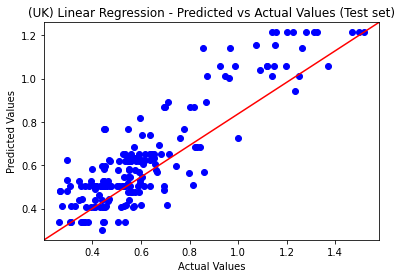

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [30]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                   Coef Val  Abs Coef Val
school_closing                    -0.156237      0.156237
workplace_closing                  0.030794      0.030794
cancel_public_events              -0.200435      0.200435
restrictions_on_gatherings        -0.210138      0.210138
public_transport_closing           0.068279      0.068279
stay_at_home_requirements          0.005533      0.005533
restrictions_on_internal_movement -0.147918      0.147918
international_travel_controls     -0.035365      0.035365
income_support                    -0.081310      0.081310
public_information_campaigns      -0.240775      0.240775
facial_coverings                  -0.048391      0.048391
vaccination_policy                 0.028323      0.028323
stringency_index                   0.038629      0.038629


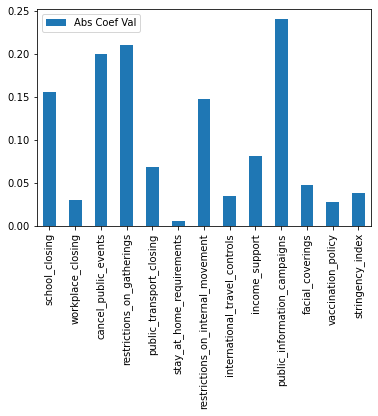

In [31]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

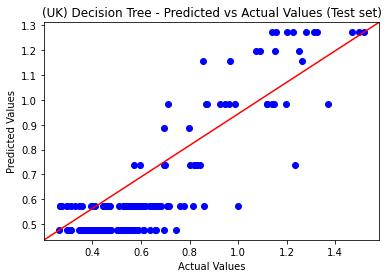

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

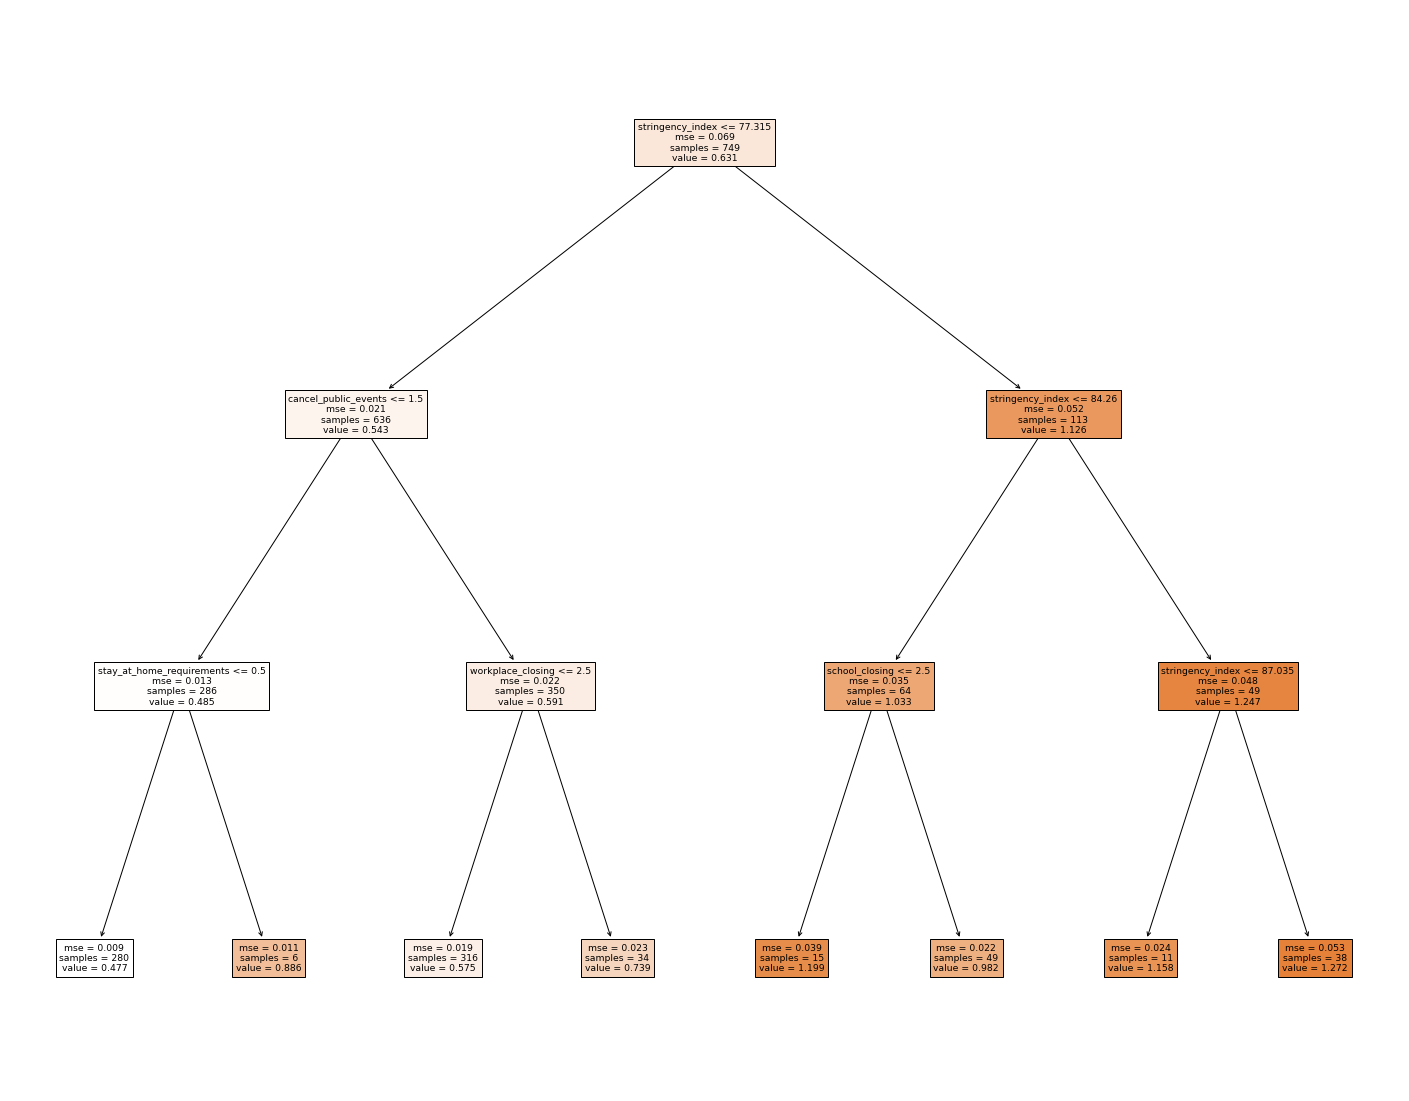

In [33]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

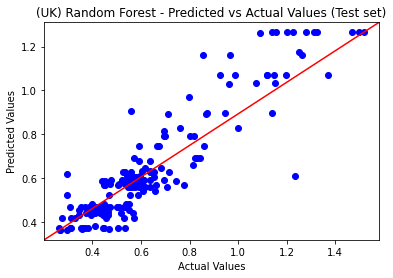

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

## Indonesia

In [35]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_id.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_id["independent"], 
                                                    test_size = 0.2, random_state =1)

In [37]:
trained_models_id = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["train_score"].append(rmse_t)
    trained_models_id["test_score"].append(rmse)

In [38]:
for x in range(len(trained_models_id['model'])):
    print('Training Score for', trained_models_id['model'][x], ':', trained_models_id['train_score'][x])
    print('Testing Score for', trained_models_id['model'][x], ':', trained_models_id['test_score'][x])

Training Score for LinearRegression() : 0.15678072892345352
Testing Score for LinearRegression() : 0.14713309977344852
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.1688623886434292
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.15875034306563932
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.12383928892246998
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.11023979094337494


### The Linear Regression Model

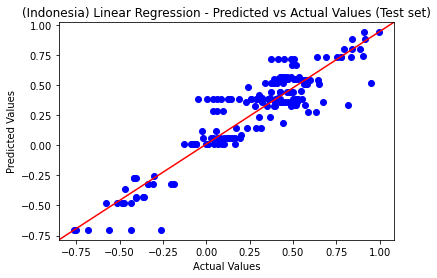

In [39]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(Indonesia) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [40]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     1.633093e-01  1.633093e-01
workplace_closing                  3.040074e-01  3.040074e-01
cancel_public_events               2.404465e-01  2.404465e-01
restrictions_on_gatherings         1.972506e-01  1.972506e-01
public_transport_closing           1.507464e-01  1.507464e-01
stay_at_home_requirements         -5.810060e-02  5.810060e-02
restrictions_on_internal_movement  3.110997e-01  3.110997e-01
international_travel_controls      1.178863e-01  1.178863e-01
income_support                    -3.297354e-01  3.297354e-01
public_information_campaigns      -4.857226e-16  4.857226e-16
facial_coverings                  -1.245315e-01  1.245315e-01
vaccination_policy                -2.882004e-02  2.882004e-02
stringency_index                  -3.072715e-02  3.072715e-02


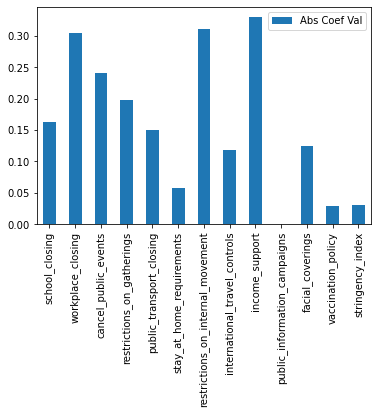

In [41]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

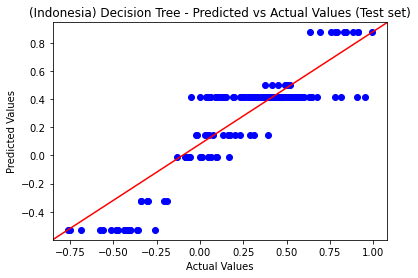

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(Indonesia) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

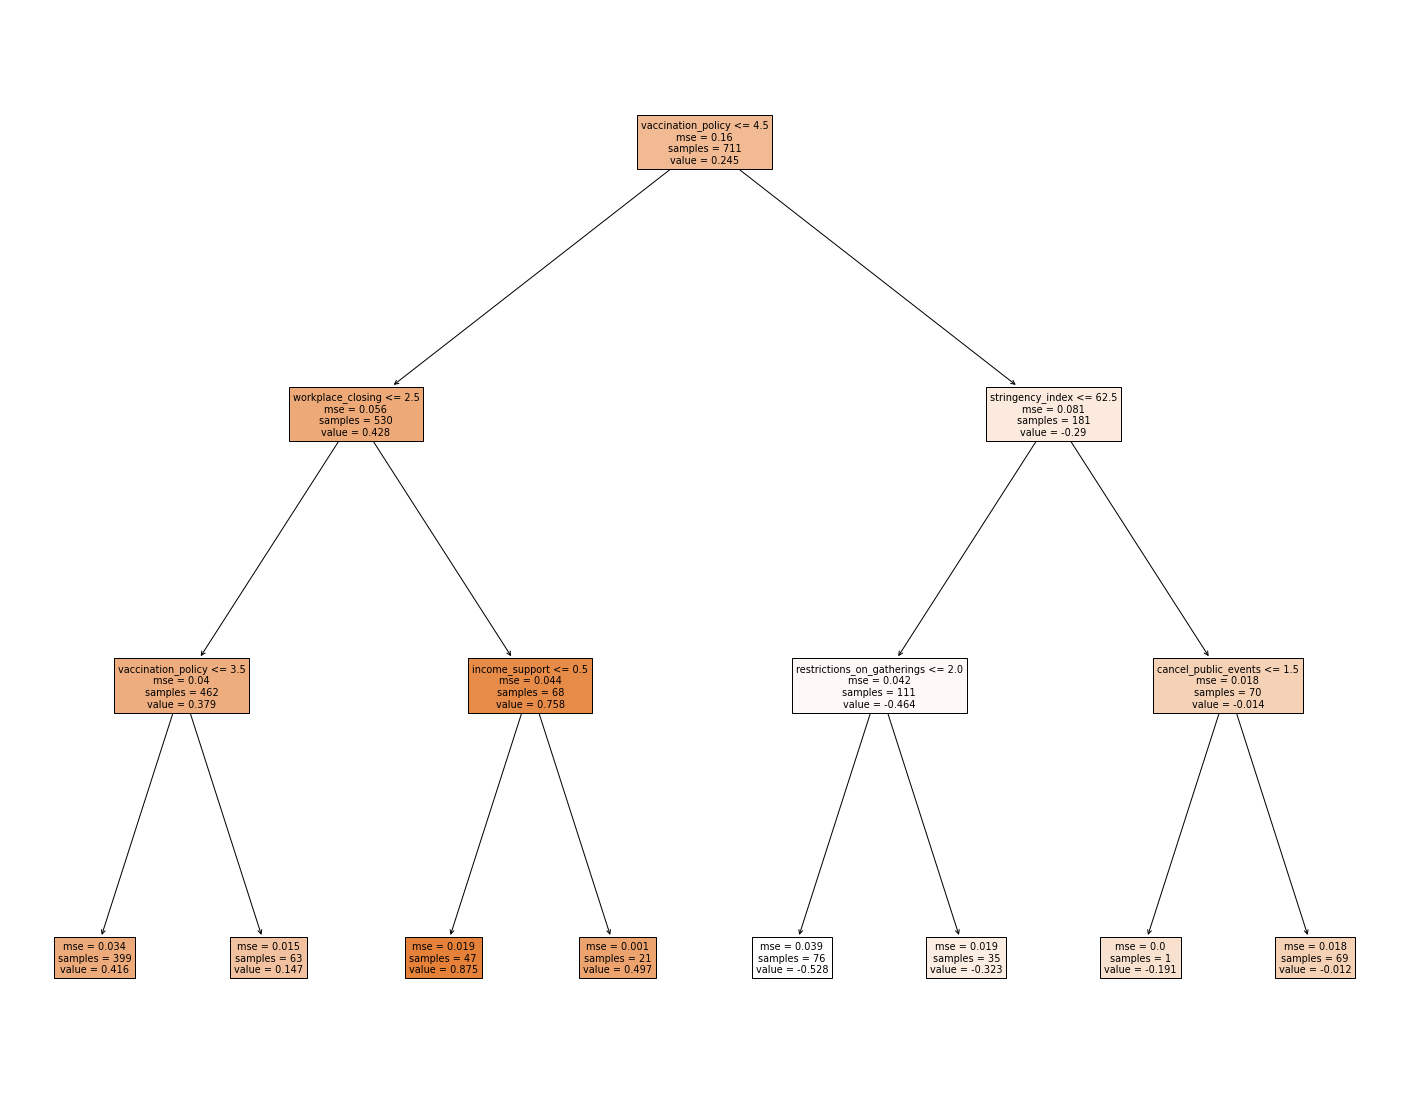

In [43]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

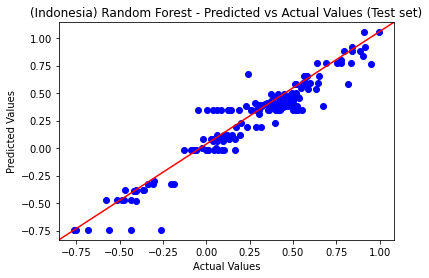

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

## Singapore

In [45]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_sg.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_sg["independent"], 
                                                    test_size = 0.2, random_state =1)

In [47]:
trained_models_sg = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["train_score"].append(rmse_t)
    trained_models_sg["test_score"].append(rmse)

In [48]:
for x in range(len(trained_models_sg['model'])):
    print('Training Score for', trained_models_sg['model'][x], ':', trained_models_sg['train_score'][x])
    print('Testing Score for', trained_models_sg['model'][x], ':', trained_models_sg['test_score'][x])

Training Score for LinearRegression() : 0.15458434635026644
Testing Score for LinearRegression() : 0.16807444553080733
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.14906870393037705
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.16114732979421037
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.13631555509188875
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.1497732846672


### The Linear Regression Model

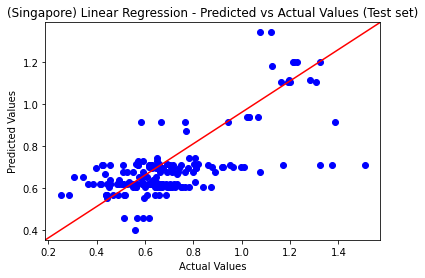

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(Singapore) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [50]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     2.319862e-01  2.319862e-01
workplace_closing                  4.637698e-02  4.637698e-02
cancel_public_events               2.918271e-02  2.918271e-02
restrictions_on_gatherings         3.928761e-02  3.928761e-02
public_transport_closing          -9.020562e-16  9.020562e-16
stay_at_home_requirements         -7.145237e-01  7.145237e-01
restrictions_on_internal_movement  5.812721e-01  5.812721e-01
international_travel_controls      1.649067e-01  1.649067e-01
income_support                     1.598017e-01  1.598017e-01
public_information_campaigns      -1.221245e-15  1.221245e-15
facial_coverings                   2.012769e-02  2.012769e-02
vaccination_policy                 1.098795e-02  1.098795e-02
stringency_index                  -7.908620e-03  7.908620e-03


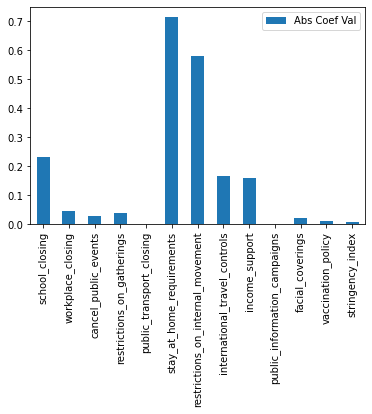

In [51]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

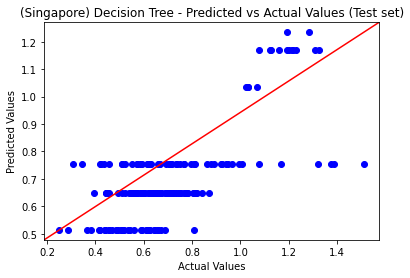

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(Singapore) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

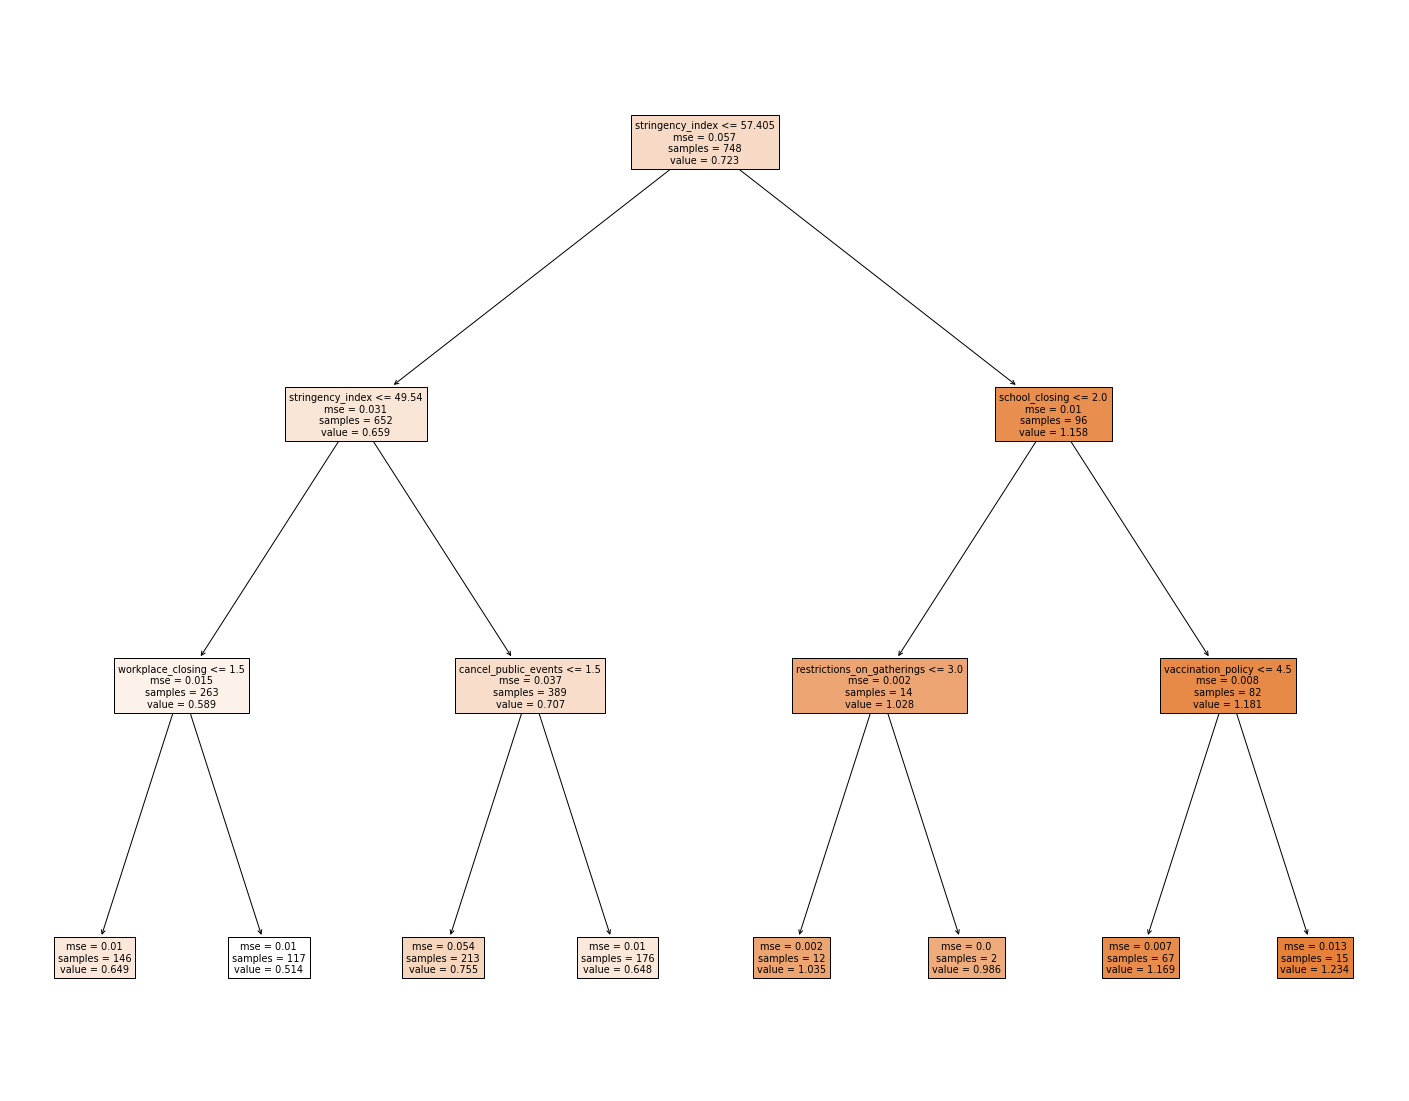

In [53]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

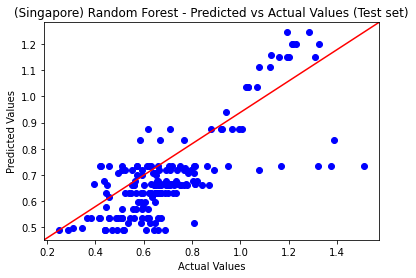

In [54]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

### Part 3: Which approach was more effective - Indirect Response

*Inirect Response: Whether these actions made an impact on covid deaths*

Independent variable 2 (indirect reponse) - covid deaths
Dependent variables - the reduced govt response dataset

Variables to select: perc_new_vacc - the number of new vaccinations as a percentage of the maximum

### Train model for part 3 - part 2

One model for each country

## England

In [55]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_gb.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_gb["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [57]:
trained_models_gb = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["train_score"].append(rmse_t)
    trained_models_gb["test_score"].append(rmse)

In [58]:
for x in range(len(trained_models_gb['model'])):
    print('Training Score for', trained_models_gb['model'][x], ':', trained_models_gb['train_score'][x])
    print('Testing Score for', trained_models_gb['model'][x], ':', trained_models_gb['test_score'][x])

Training Score for LinearRegression() : 0.11829884619036429
Testing Score for LinearRegression() : 0.13096575071658548
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.0945412525196545
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.10478823285031769
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.06512851649924008
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.08211853065221449


### The Linear Regression Model

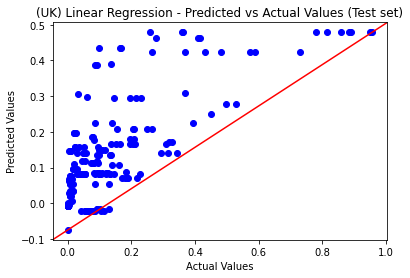

In [59]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [60]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                   Coef Val  Abs Coef Val
school_closing                    -0.040779      0.040779
workplace_closing                  0.026023      0.026023
cancel_public_events              -0.236904      0.236904
restrictions_on_gatherings        -0.071763      0.071763
public_transport_closing           0.036301      0.036301
stay_at_home_requirements         -0.031520      0.031520
restrictions_on_internal_movement -0.091496      0.091496
international_travel_controls     -0.097362      0.097362
income_support                    -0.101294      0.101294
public_information_campaigns      -0.137935      0.137935
facial_coverings                   0.038249      0.038249
vaccination_policy                 0.010399      0.010399
stringency_index                   0.024074      0.024074


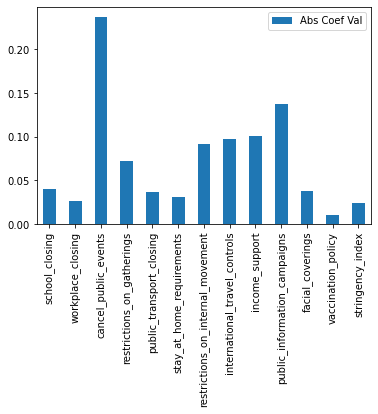

In [61]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

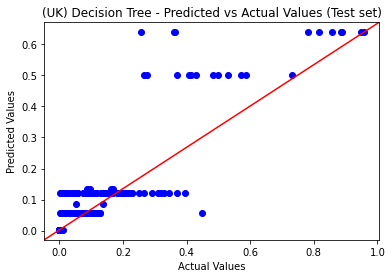

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

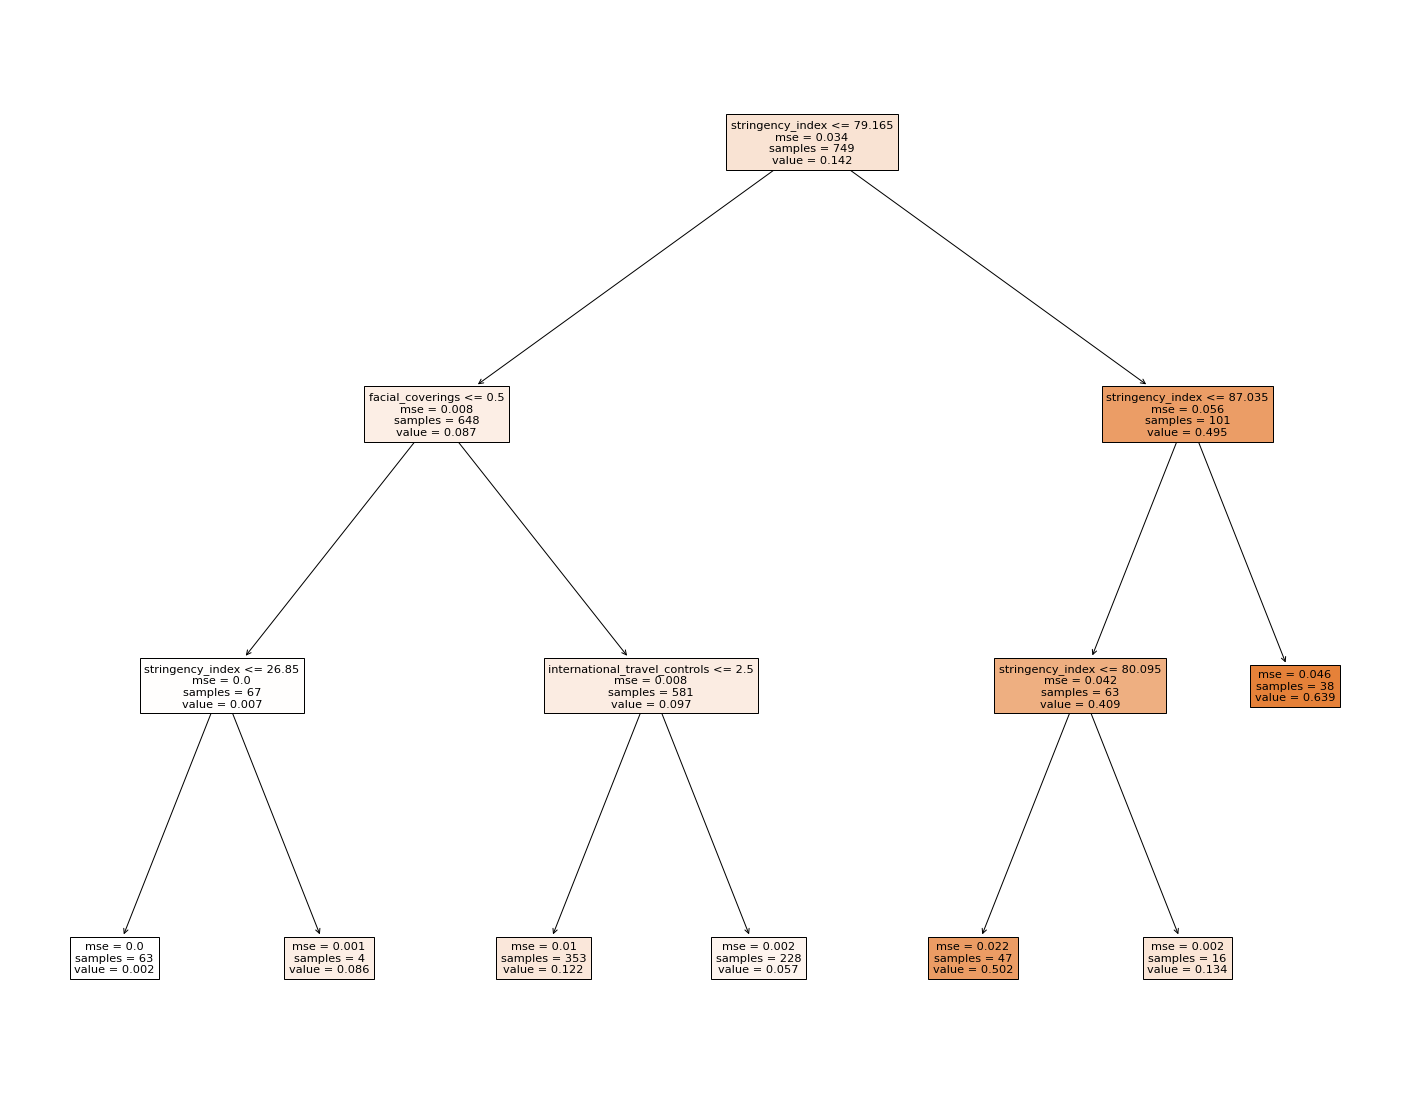

In [63]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

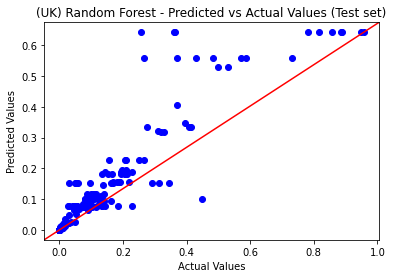

In [64]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

## Indonesia

In [65]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_id.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_id["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [67]:
trained_models_id = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["train_score"].append(rmse_t)
    trained_models_id["test_score"].append(rmse)

In [68]:
for x in range(len(trained_models_id['model'])):
    print('Training Score for', trained_models_id['model'][x], ':', trained_models_id['train_score'][x])
    print('Testing Score for', trained_models_id['model'][x], ':', trained_models_id['test_score'][x])

Training Score for LinearRegression() : 0.1197598171544799
Testing Score for LinearRegression() : 0.12316544980425025
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.10476846795110775
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.08494370396279463
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.1026222760654564
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.08401789649850253


### The Linear Regression Model

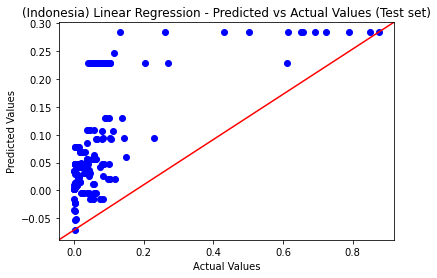

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(Indonesia) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [70]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     1.466119e-01  1.466119e-01
workplace_closing                  2.474003e-03  2.474003e-03
cancel_public_events               7.069015e-02  7.069015e-02
restrictions_on_gatherings         3.893988e-02  3.893988e-02
public_transport_closing           5.462368e-02  5.462368e-02
stay_at_home_requirements          8.406679e-02  8.406679e-02
restrictions_on_internal_movement  3.794036e-02  3.794036e-02
international_travel_controls     -1.271967e-04  1.271967e-04
income_support                     5.160811e-03  5.160811e-03
public_information_campaigns       6.938894e-17  6.938894e-17
facial_coverings                   1.774805e-02  1.774805e-02
vaccination_policy                 5.494383e-02  5.494383e-02
stringency_index                  -1.302349e-02  1.302349e-02


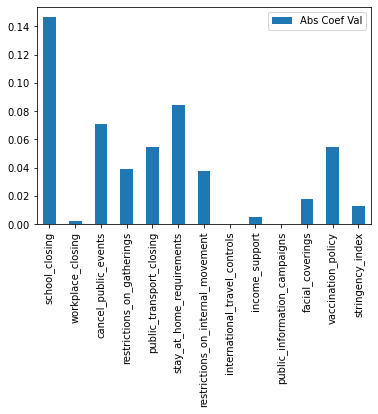

In [71]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

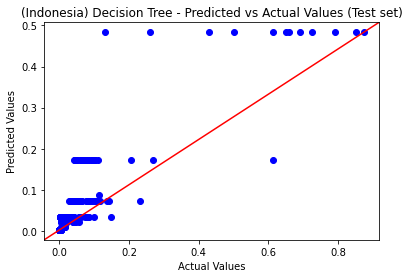

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(Indonesia) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

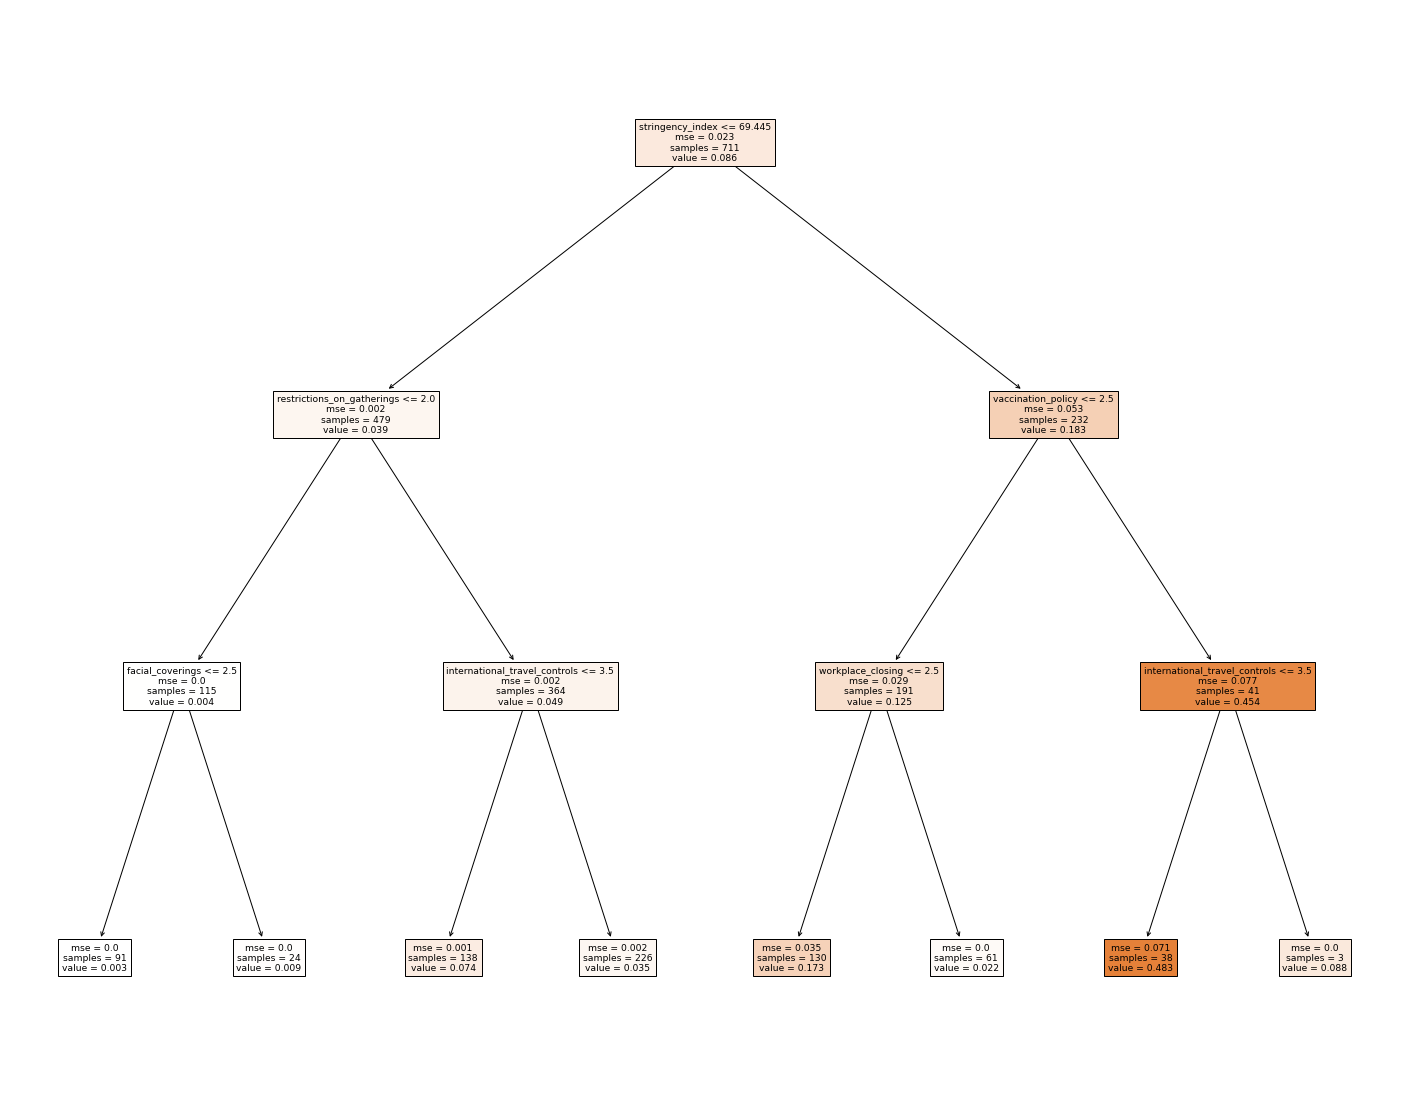

In [73]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

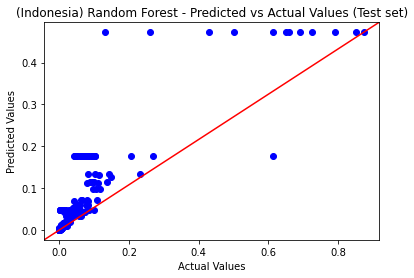

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

## Singapore

In [75]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_sg.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_sg["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [77]:
trained_models_sg = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["train_score"].append(rmse_t)
    trained_models_sg["test_score"].append(rmse)

In [78]:
for x in range(len(trained_models_sg['model'])):
    print('Training Score for', trained_models_sg['model'][x], ':', trained_models_sg['train_score'][x])
    print('Testing Score for', trained_models_sg['model'][x], ':', trained_models_sg['test_score'][x])

Training Score for LinearRegression() : 0.14129101142015035
Testing Score for LinearRegression() : 0.14519529828476585
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.12084619780760504
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.12500058124829364
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.11254028893338194
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.1194036442098561


### The Linear Regression Model

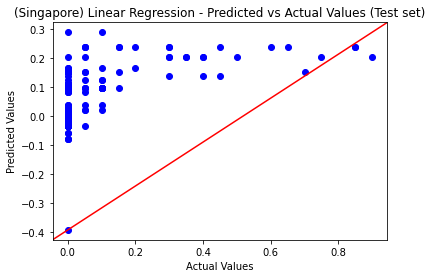

In [79]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(Singapore) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [80]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                    -2.054408e-01  2.054408e-01
workplace_closing                 -1.495416e-01  1.495416e-01
cancel_public_events              -2.370332e-01  2.370332e-01
restrictions_on_gatherings        -1.561141e-01  1.561141e-01
public_transport_closing          -2.775558e-17  2.775558e-17
stay_at_home_requirements         -3.367705e-01  3.367705e-01
restrictions_on_internal_movement -2.111431e-01  2.111431e-01
international_travel_controls     -2.299511e-01  2.299511e-01
income_support                    -2.388761e-03  2.388761e-03
public_information_campaigns      -2.636780e-16  2.636780e-16
facial_coverings                   1.898659e-02  1.898659e-02
vaccination_policy                 4.213963e-02  4.213963e-02
stringency_index                   5.162524e-02  5.162524e-02


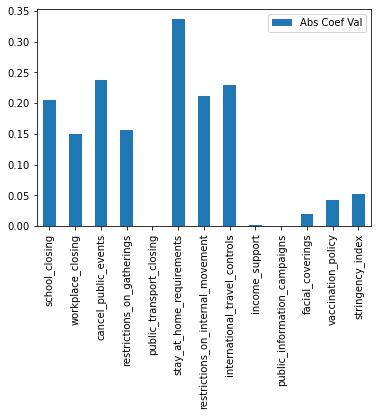

In [81]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

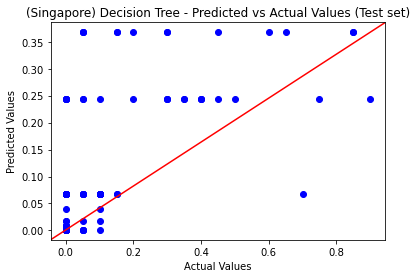

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(Singapore) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

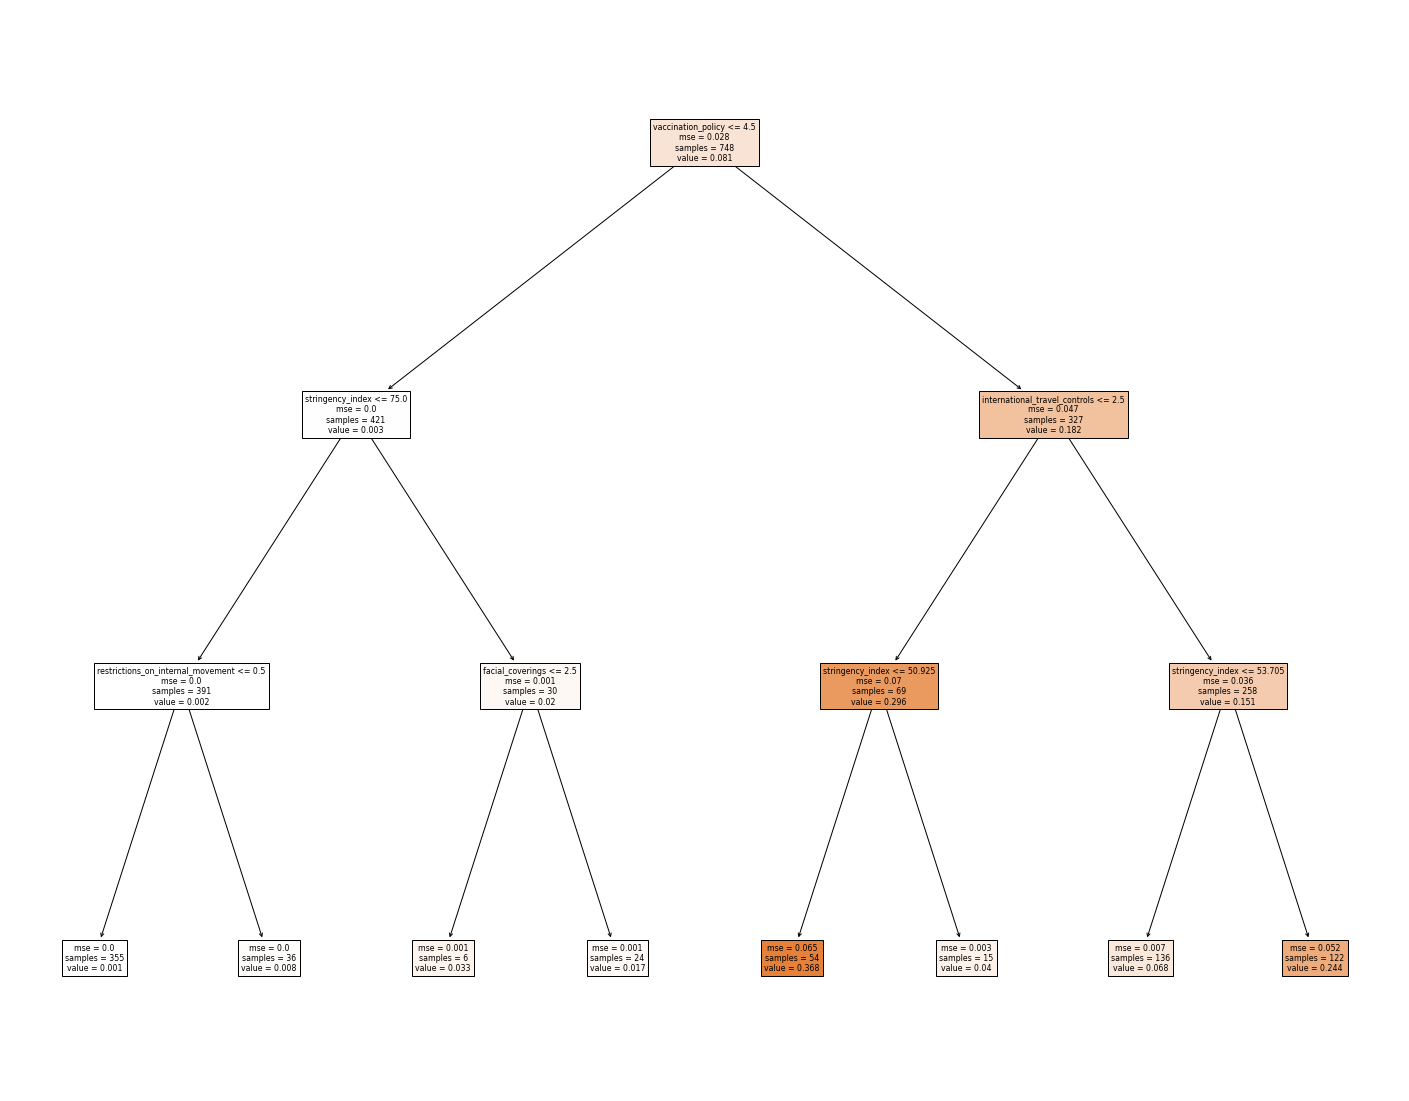

In [83]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)

### The Random Forest

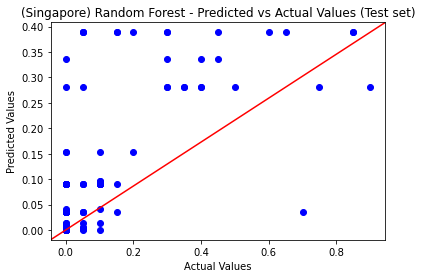

In [84]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()